In [1]:
import sklearn as skl
import sys
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
import janitor
import cairo
import random
from plotly.subplots import make_subplots
from sklearn.cluster import KMeans
from kmodes.kprototypes import KPrototypes
from collections import namedtuple
from random import randint

In [2]:
np.set_printoptions(threshold=sys.maxsize)

In [3]:
df = pd.read_excel('DataVisualizationV5.xlsx', sheet_name='QualitySheet')
pf = pd.read_excel('DataVisualizationV5.xlsx', sheet_name='PhaseSheet')
ss = pd.read_excel('DataVisualizationV5.xlsx', sheet_name='SizeSpec')

In [4]:
jitteredDf = df.copy()
sample = df.copy()
sample = sample.drop(columns=['Quality'])

In [5]:
sample = sample.columns.values.tolist()

In [6]:
for f in sample:
    jitteredDf.jitter(
        column_name=f,
        dest_column_name=f,
        scale=0.5,
        clip=None,
        random_state=None
    )

In [7]:
meltedPhases = pf.melt('Procedures', var_name='Instruments')

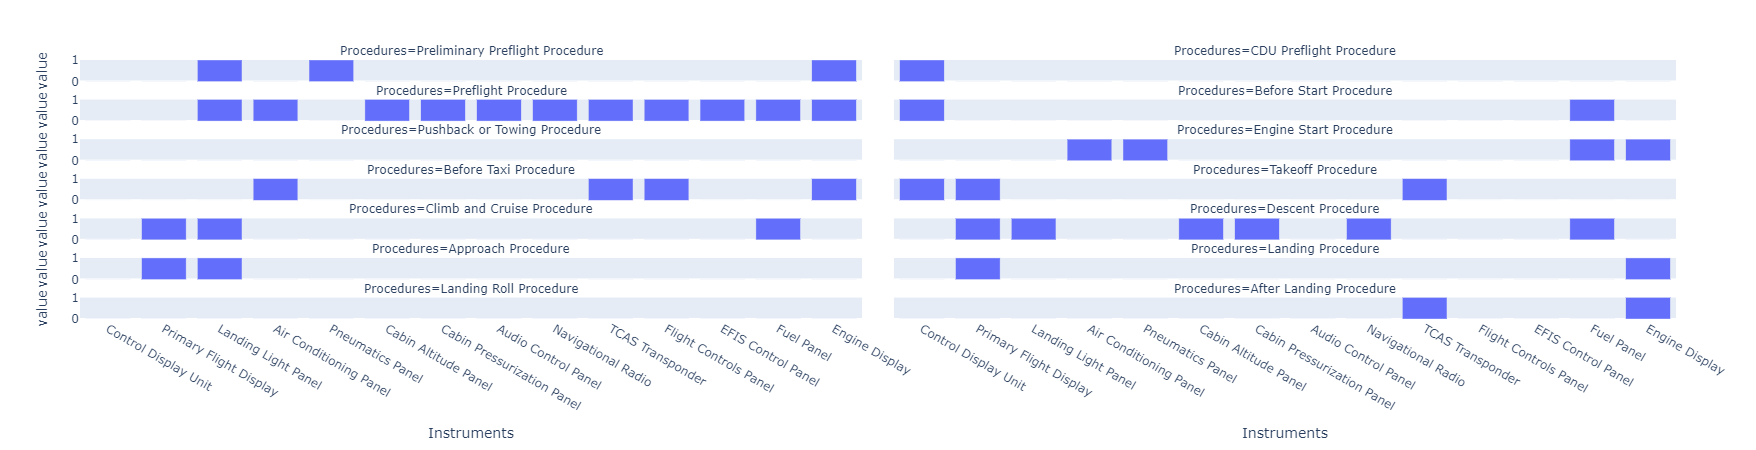

In [8]:
fig = px.bar(meltedPhases, x="Instruments", y="value",
             facet_col="Procedures",
            facet_col_wrap=2)
fig.update_yaxes(range=[0,1])
fig.update_yaxes(nticks=2)
fig.show()

In [9]:
meltedDf = df.melt('Quality', var_name='Instruments')

In [10]:
jitteredMelt = jitteredDf.melt('Quality', var_name='Instruments')

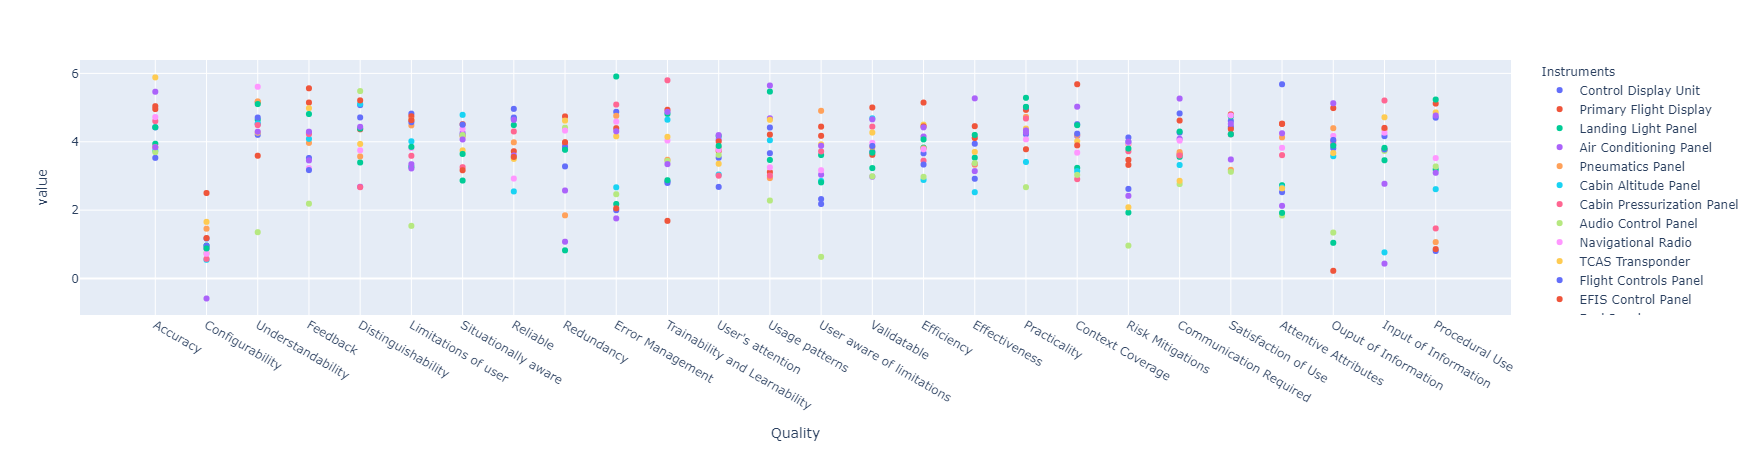

In [11]:
fig = px.scatter(jitteredMelt, x="Quality", y="value", color="Instruments")
fig.show()

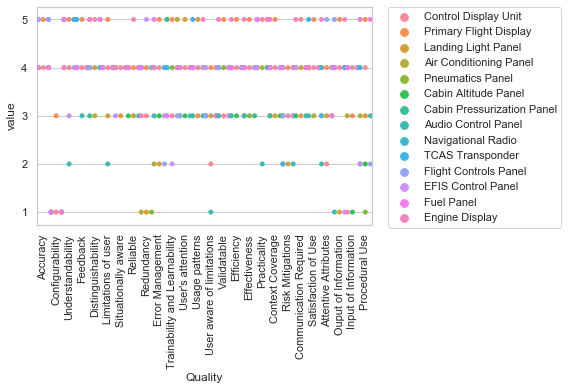

In [12]:
y = [1, 2, 3, 4, 5]
yint = range(min(y), math.ceil(max(y))+1)
sns.set(style="whitegrid", color_codes=True)
g = sns.swarmplot(x="Quality", y="value", hue='Instruments', data=meltedDf)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.rcParams['figure.figsize'] = [25, 25]
plt.yticks(yint)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

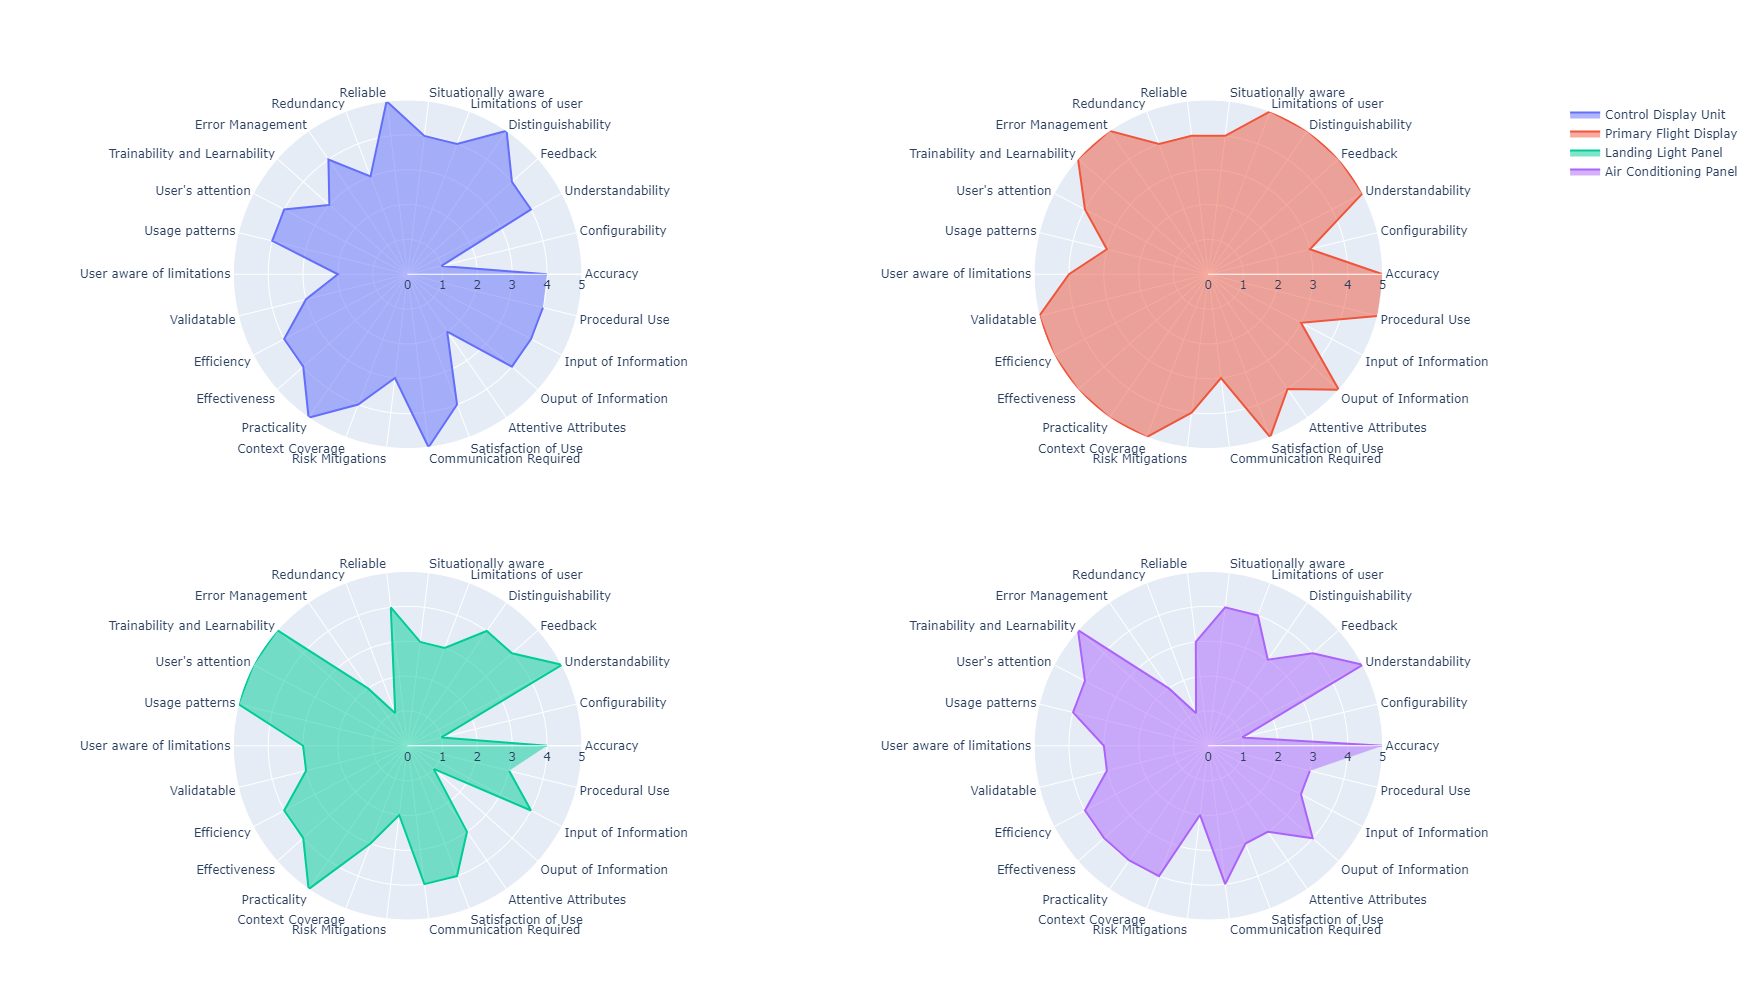

In [13]:
fig = make_subplots(rows=2, cols=2,
                   specs=[[{"type": "polar"}, {"type": "polar"}],
                         [{"type": "polar"}, {"type": "polar"}]])
fig.add_trace(go.Scatterpolar(
    name="Control Display Unit",
    r=df['Control Display Unit'],
    theta=df['Quality'],
    fill='toself'
    ), 1, 1)
fig.add_trace(go.Scatterpolar(
    name="Primary Flight Display",
    r=df['Primary Flight Display'],
    theta=df['Quality'],
    fill='toself'
    ), 1, 2)
fig.add_trace(go.Scatterpolar(
    name="Landing Light Panel",
    r=df['Landing Light Panel'],
    theta=df['Quality'],
    fill='toself'
    ), 2, 1)
fig.add_trace(go.Scatterpolar(
    name="Air Conditioning Panel",
    r=df['Air Conditioning Panel'],
    theta=df['Quality'],
    fill='toself'
    ), 2, 2)
fig.update_layout(height=1000, width=1500)
fig.show()

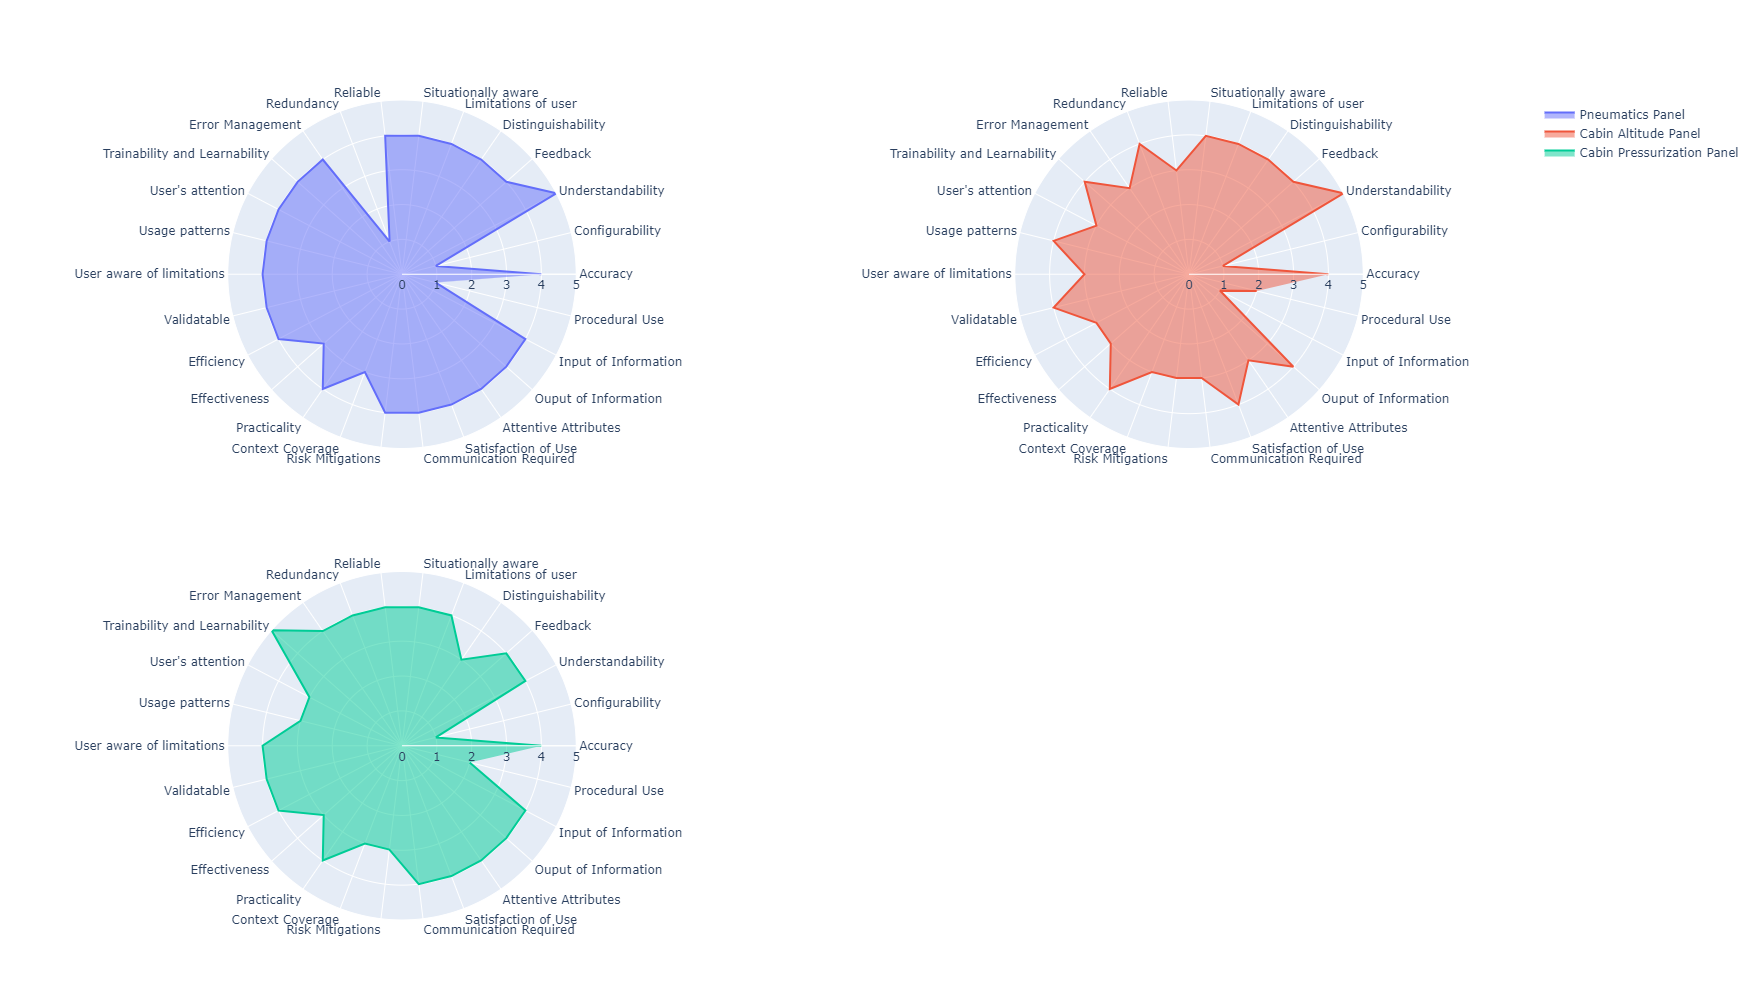

In [14]:
fig = make_subplots(rows=2, cols=2,
                   specs=[[{"type": "polar"}, {"type": "polar"}],
                         [{"type": "polar"}, {"type": "polar"}]])
fig.add_trace(go.Scatterpolar(
    name="Pneumatics Panel",
    r=df['Pneumatics Panel'],
    theta=df['Quality'],
    fill='toself'
    ), 1, 1)
fig.add_trace(go.Scatterpolar(
    name="Cabin Altitude Panel",
    r=df['Cabin Altitude Panel'],
    theta=df['Quality'],
    fill='toself'
    ), 1, 2)
fig.add_trace(go.Scatterpolar(
    name="Cabin Pressurization Panel",
    r=df['Cabin Pressurization Panel'],
    theta=df['Quality'],
    fill='toself'
    ), 2, 1)
fig.update_layout(height=1000, width=1500)
fig.show()

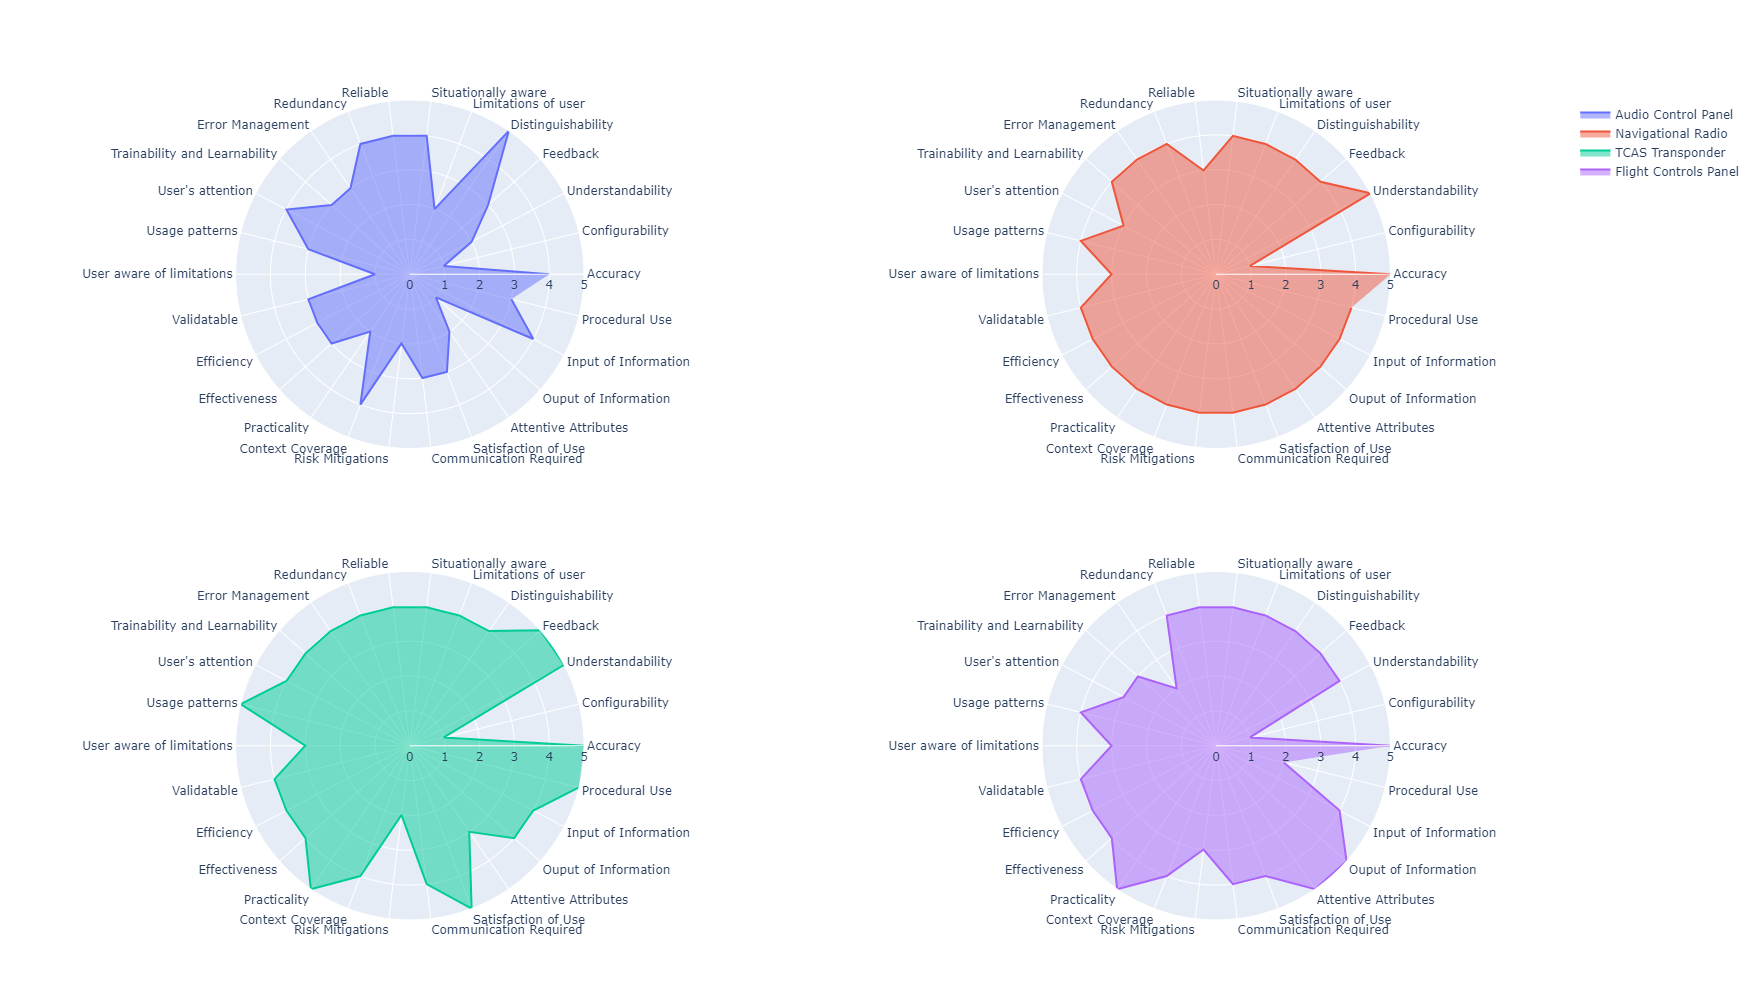

In [15]:
fig = make_subplots(rows=2, cols=2,
                   specs=[[{"type": "polar"}, {"type": "polar"}],
                         [{"type": "polar"}, {"type": "polar"}]])
fig.add_trace(go.Scatterpolar(
    name="Audio Control Panel",
    r=df['Audio Control Panel'],
    theta=df['Quality'],
    fill='toself'
    ), 1, 1)
fig.add_trace(go.Scatterpolar(
    name="Navigational Radio",
    r=df['Navigational Radio'],
    theta=df['Quality'],
    fill='toself'
    ), 1, 2)
fig.add_trace(go.Scatterpolar(
    name="TCAS Transponder",
    r=df['TCAS Transponder'],
    theta=df['Quality'],
    fill='toself'
    ), 2, 1)
fig.add_trace(go.Scatterpolar(
    name="Flight Controls Panel",
    r=df['Flight Controls Panel'],
    theta=df['Quality'],
    fill='toself'
    ), 2, 2)
fig.update_layout(height=1000, width=1500)
fig.show()

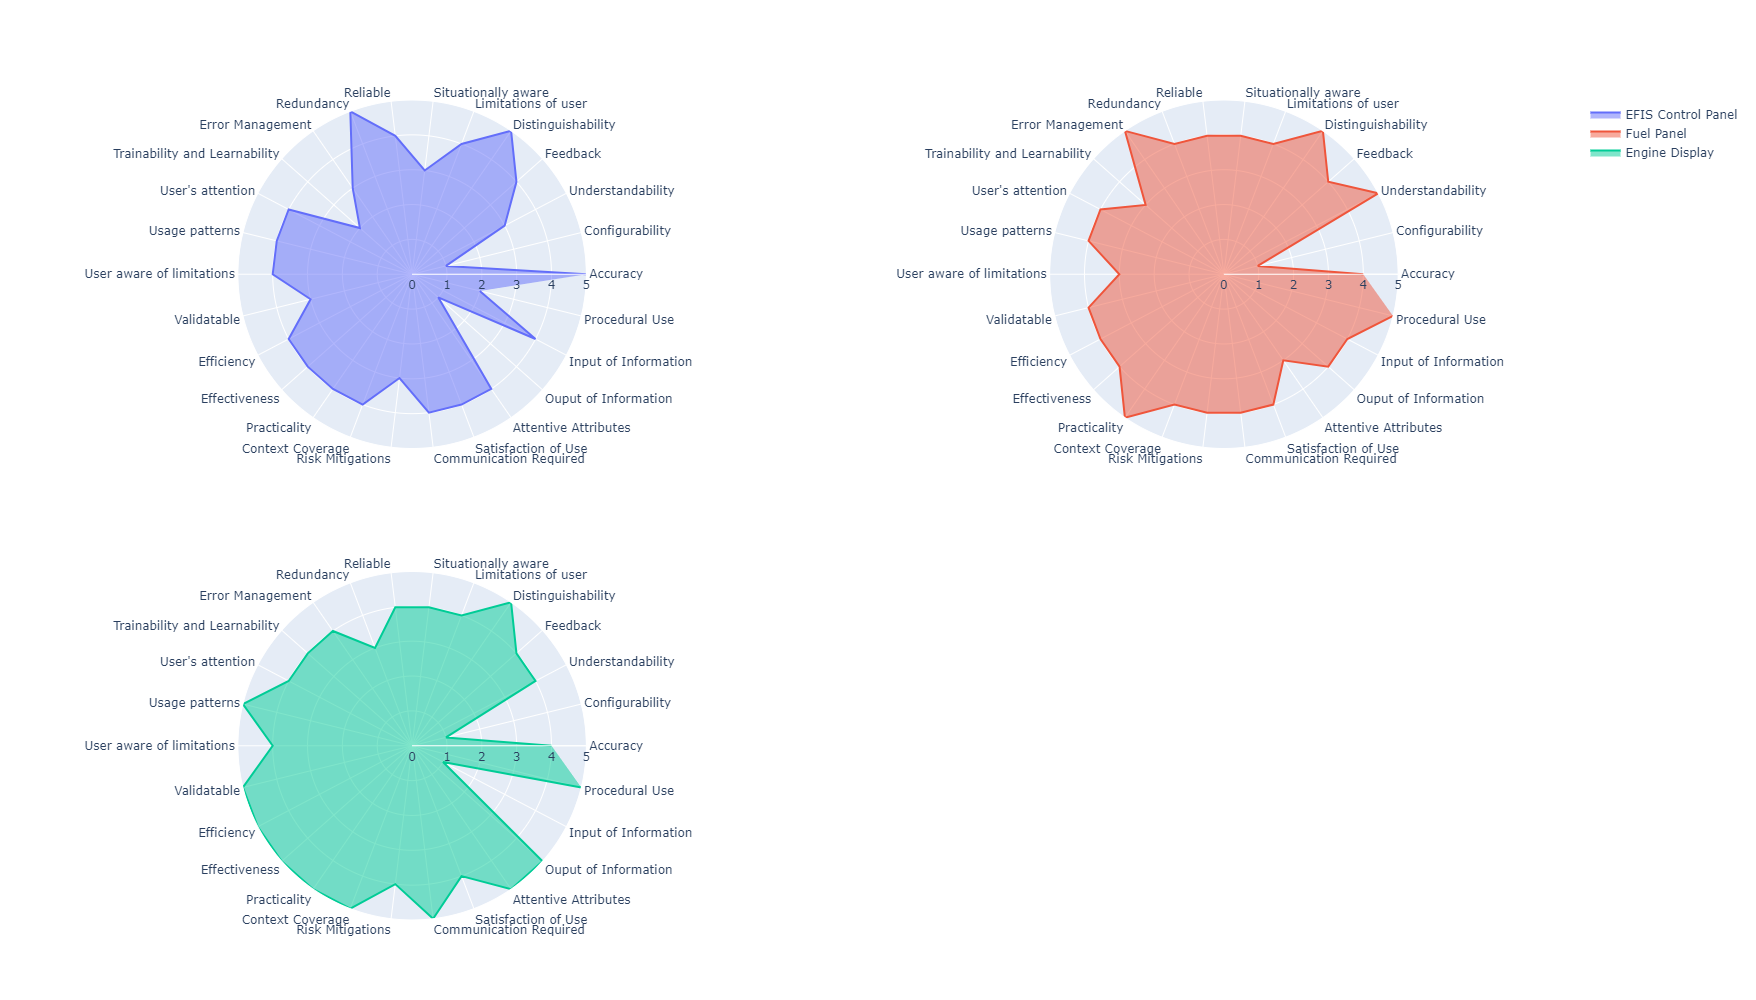

In [16]:
fig = make_subplots(rows=2, cols=2,
                   specs=[[{"type": "polar"}, {"type": "polar"}],
                         [{"type": "polar"}, {"type": "polar"}]])
fig.add_trace(go.Scatterpolar(
    name="EFIS Control Panel",
    r=df['EFIS Control Panel'],
    theta=df['Quality'],
    fill='toself'
    ), 1, 1)
fig.add_trace(go.Scatterpolar(
    name="Fuel Panel",
    r=df['Fuel Panel'],
    theta=df['Quality'],
    fill='toself'
    ), 1, 2)
fig.add_trace(go.Scatterpolar(
    name="Engine Display",
    r=df['Engine Display'],
    theta=df['Quality'],
    fill='toself'
    ), 2, 1)
fig.update_layout(height=1000, width=1500)
fig.show()

In [17]:
X = jitteredDf.iloc[:,1:].values

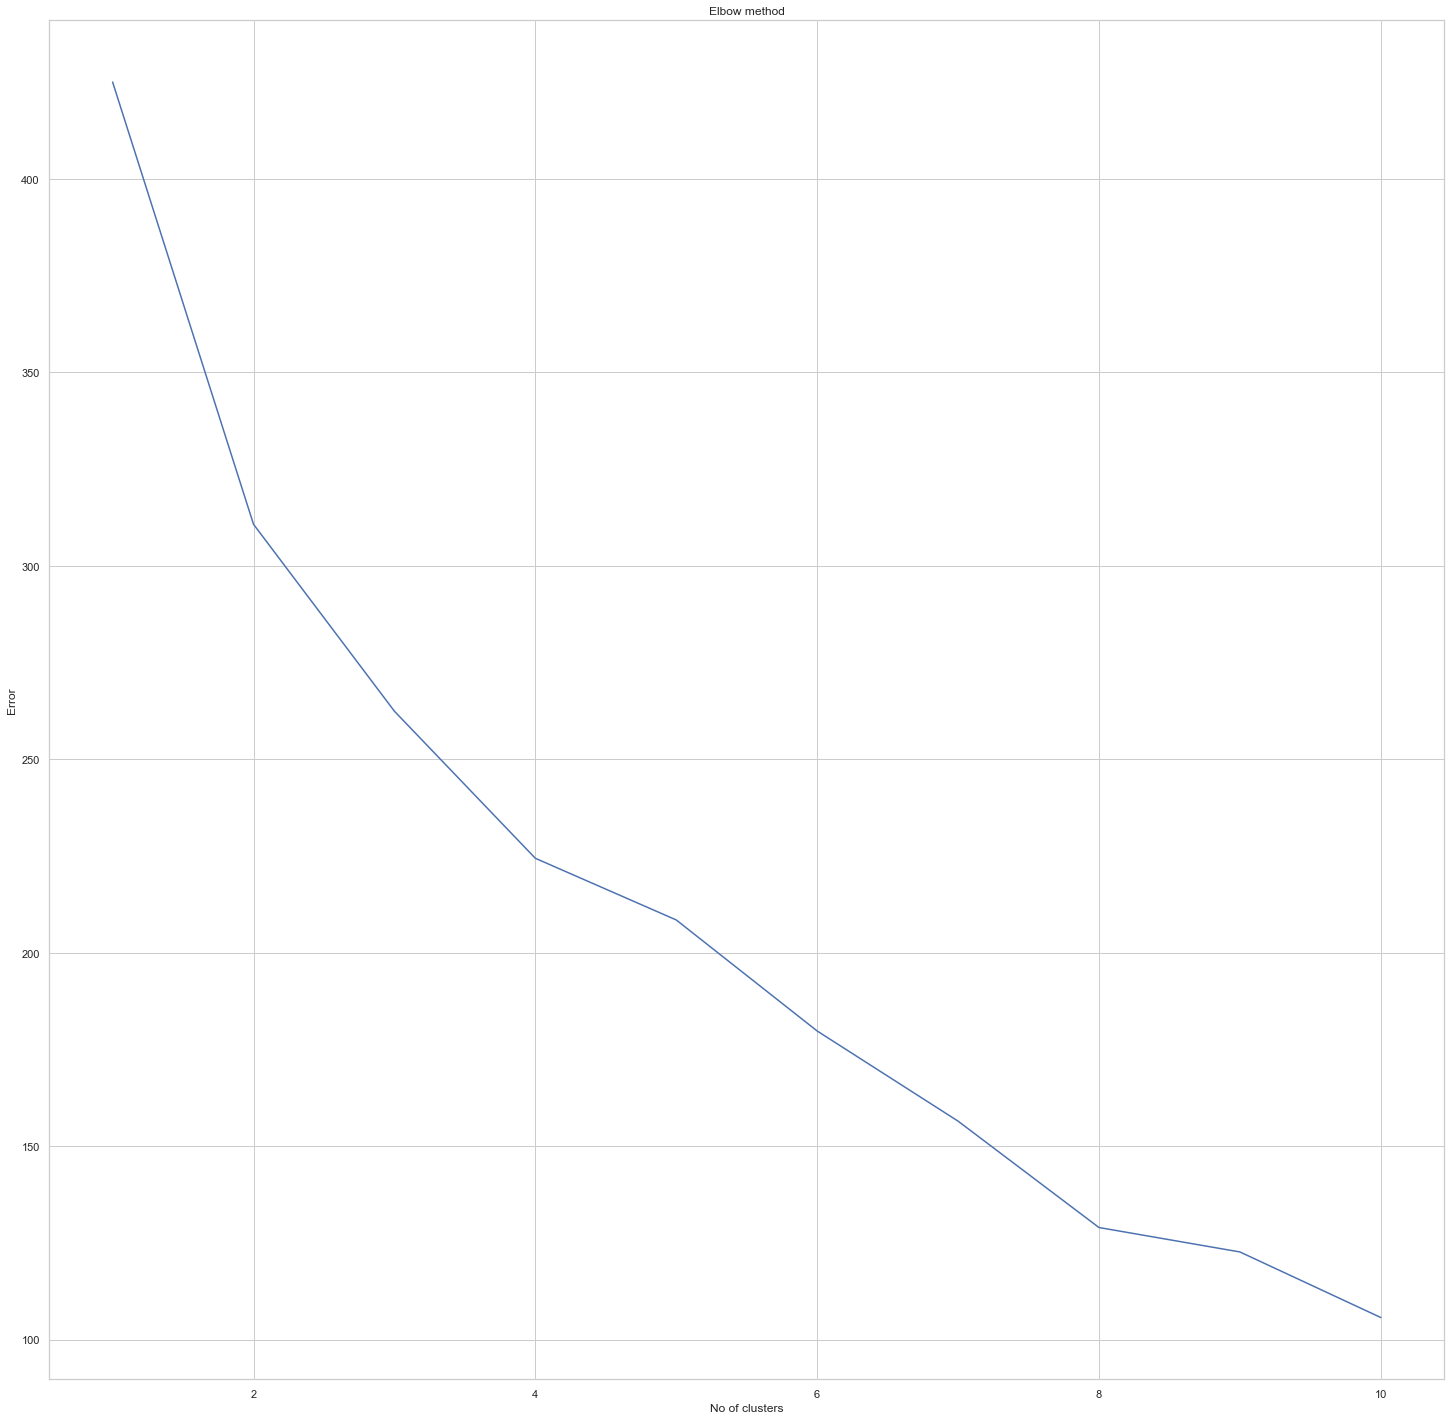

In [18]:
## Elbow method
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(X)
    kmeans.fit(X)
    Error.append(kmeans.inertia_)
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

In [19]:
kPro = KPrototypes(n_clusters=3, max_iter=600, n_init=50, init='Cao')

In [20]:
kResult = kPro.fit_predict(jitteredDf, categorical=[0])

In [21]:
jitteredDf['Clusters'] = kResult

In [22]:
jitteredMelt2 = pd.melt(jitteredDf, id_vars=['Quality', 'Clusters'], var_name='Instruments')

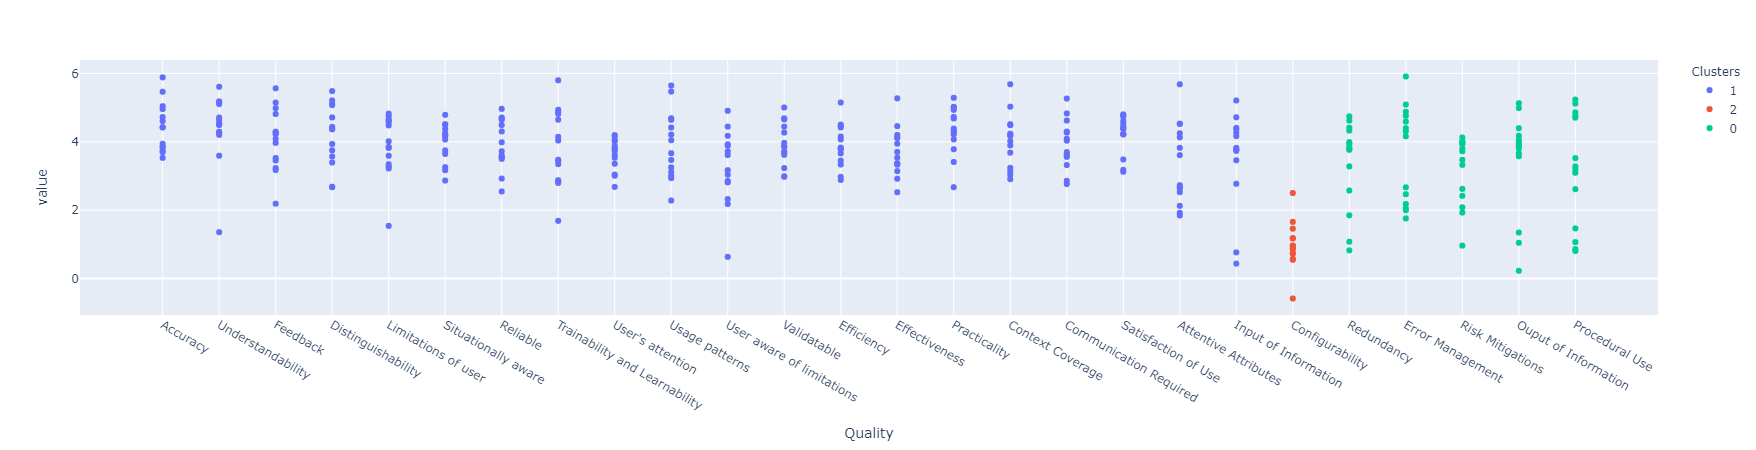

In [23]:
fig = px.scatter(jitteredMelt2, x="Quality", y="value", color="Clusters")
fig.show()

In [24]:
## Creating pandas dataframe: 1 row for each insturment with the following parameters;
# Name,TotalAttributes,ProceduralUse,Height,Width
# 4 columns added later for points AboveRight,AboveLeft,UnderRight,UnderLeft
instFrame = pd.DataFrame(columns=['Name', 'TotalAttributes',
                                  'ProceduralUse', 'Height',
                                  'Width', 'AboveRight',
                                  'AboveLeft','UnderRight',
                                  'UnderLeft'])
print(instFrame)

Empty DataFrame
Columns: [Name, TotalAttributes, ProceduralUse, Height, Width, AboveRight, AboveLeft, UnderRight, UnderLeft]
Index: []


In [25]:
columnList = df.columns.values.tolist()
columnList.remove('Quality')

In [26]:
for inst in columnList:
    instFrame = instFrame.append({'Name': inst, 'TotalAttributes': df[inst].sum(),
                                  'ProceduralUse': pf[inst].sum(),
                                  'Height':ss.loc[ss.Instrument == inst]['Height'].values[0],
                                  'Width' :ss.loc[ss.Instrument == inst]['Width'].values[0]},
                                 ignore_index=True)

instFrame = instFrame.sort_values(by=['ProceduralUse'], ascending=False)

In [27]:
############ Drawing section Algorithm ###########
Point = namedtuple('Point', 'x y')
PointListCovered = []
colourUsed = []

In [28]:
## 100 colours
colourList = []
for i in range (100):
    colour = (randint(99,255)/255.0,randint(99,255)/255.0,randint(99,255)/255.0)
    while colour not in colourList:
        colour = (randint(99,255)/255.0,randint(99,255)/255.0,randint(99,255)/255.0)
        colourList.append(colour)

In [29]:
## Colour Picker
def colPick():
    picked = random.choice(colourList)
    if picked in colourUsed:
        while picked in colourUsed:
            picked = random.choice(colourList)
        colourUsed.append(picked)
        return picked
    else:
        colourUsed.append(picked)
        return picked

In [30]:
## Art Canvas ##
paintWidth = 5000
paintHeight = 5000
ims = cairo.ImageSurface(cairo.FORMAT_ARGB32, paintWidth, paintHeight)
cr = cairo.Context(ims)

In [31]:
## Co-ordinate checker
def coChecker(bottomLeft, bottomRight, topLeft, topRight):
    print("Coordinate checker run")
    (bottomLeftX, bottomLeftY) = bottomLeft
    (bottomRightX, bottomRightY) = bottomRight
    (topLeftX, topLeftY) = topLeft
    (topRightX, topRightY) = topRight
    for i in range(topLeftX, topRightX+1):
        for y in range(topRightY, bottomRightY+1):
            if Point(i, y) in PointListCovered:
                return True
    return False

In [32]:
"""
## North: Above Right source = Below Right start
def northOne(newX, newY, width, height):
    print("Precursor is an AboveRight so our point will be a BelowRight")
    ## This means the starting point will be a BelowRight
    bottomRight = Point(newX, newY)
    bottomLeft = Point(newX-width, newY)
    topRight = Point(newX, newY-height)
    topLeft = Point(newX-width, newY-height)
    result = coChecker(bottomLeft, bottomRight, topLeft, topRight)
    if result == False:
        print("North Precursor success")
        return bottomLeft, bottomRight, topLeft, topRight
    else: 
        print("North Precursor fail")
        return None
"""

'\n## North: Above Right source = Below Right start\ndef northOne(newX, newY, width, height):\n    print("Precursor is an AboveRight so our point will be a BelowRight")\n    ## This means the starting point will be a BelowRight\n    bottomRight = Point(newX, newY)\n    bottomLeft = Point(newX-width, newY)\n    topRight = Point(newX, newY-height)\n    topLeft = Point(newX-width, newY-height)\n    result = coChecker(bottomLeft, bottomRight, topLeft, topRight)\n    if result == False:\n        print("North Precursor success")\n        return bottomLeft, bottomRight, topLeft, topRight\n    else: \n        print("North Precursor fail")\n        return None\n'

In [33]:
"""
## North: Above Left source = Below Left start
def northTwo(newX, newY, width, height):
    print("Precursor is an AboveLeft so our point will be a BelowLeft")
    ## This means the starting point will be a BelowLeft
    bottomRight = Point(newX+width,newY)
    bottomLeft = Point(newX, newY)
    topRight = Point(newX+width, newY-height)
    topLeft = Point(newX, newY-height)
    result = coChecker(bottomLeft, bottomRight, topLeft, topRight)

    if result == False:
        print("North Precursor success")
        return bottomLeft, bottomRight, topLeft, topRight
    else: 
        print("North Precursor fail")
        return None
"""

'\n## North: Above Left source = Below Left start\ndef northTwo(newX, newY, width, height):\n    print("Precursor is an AboveLeft so our point will be a BelowLeft")\n    ## This means the starting point will be a BelowLeft\n    bottomRight = Point(newX+width,newY)\n    bottomLeft = Point(newX, newY)\n    topRight = Point(newX+width, newY-height)\n    topLeft = Point(newX, newY-height)\n    result = coChecker(bottomLeft, bottomRight, topLeft, topRight)\n\n    if result == False:\n        print("North Precursor success")\n        return bottomLeft, bottomRight, topLeft, topRight\n    else: \n        print("North Precursor fail")\n        return None\n'

In [34]:
"""
## South: Below left source = Above Left start
def southOne(newX, newY, width, height):
    print("Precursor is an UnderLeft so our point will be a AboveLeft")
    ## This means the starting point will be a AboveLeft
    bottomRight = Point(newX+width, newY+height)
    bottomLeft = Point(newX, newY+height)
    topRight = Point(newX+width, newY)
    topLeft = Point(newX, newY)
    result = coChecker(bottomLeft, bottomRight, topLeft, topRight)
    if result == False:
        print("South Precursor success")
        return bottomLeft, bottomRight, topLeft, topRight
    else: 
        print("South Precursor fail") 
        return None
"""

'\n## South: Below left source = Above Left start\ndef southOne(newX, newY, width, height):\n    print("Precursor is an UnderLeft so our point will be a AboveLeft")\n    ## This means the starting point will be a AboveLeft\n    bottomRight = Point(newX+width, newY+height)\n    bottomLeft = Point(newX, newY+height)\n    topRight = Point(newX+width, newY)\n    topLeft = Point(newX, newY)\n    result = coChecker(bottomLeft, bottomRight, topLeft, topRight)\n    if result == False:\n        print("South Precursor success")\n        return bottomLeft, bottomRight, topLeft, topRight\n    else: \n        print("South Precursor fail") \n        return None\n'

In [35]:
"""
## South: Below Right source = Above Right start
def southTwo(newX, newY, width, height):
    print("Precursor is an UnderRight so our point will be a AboveRight")
    ## This means the starting point will be a AboveRight
    bottomRight = Point(newX, newY+height)
    bottomLeft = Point(newX-width, newY+height)
    topRight = Point(newX, newY)
    topLeft = Point(newX-width, newY)
    result = coChecker(bottomLeft, bottomRight, topLeft, topRight)
    if result == False:
        print("South Precursor success")
        return bottomLeft, bottomRight, topLeft, topRight
    else: 
        print("South Precursor fail") 
        return None
"""

'\n## South: Below Right source = Above Right start\ndef southTwo(newX, newY, width, height):\n    print("Precursor is an UnderRight so our point will be a AboveRight")\n    ## This means the starting point will be a AboveRight\n    bottomRight = Point(newX, newY+height)\n    bottomLeft = Point(newX-width, newY+height)\n    topRight = Point(newX, newY)\n    topLeft = Point(newX-width, newY)\n    result = coChecker(bottomLeft, bottomRight, topLeft, topRight)\n    if result == False:\n        print("South Precursor success")\n        return bottomLeft, bottomRight, topLeft, topRight\n    else: \n        print("South Precursor fail") \n        return None\n'

In [36]:
"""
## East: Below left source = Below Right start
def eastOne(newX, newY, width, height):
    print("Precursor is an UnderLeft so our point will be a BottomRight")
    ## This means the starting point will be a BottomRight
    bottomRight = Point(newX, newY)
    bottomLeft = Point(newX-width, newY)
    topRight = Point(newX, newY-height)
    topLeft = Point(newX-width, newY-height)
    result = coChecker(bottomLeft, bottomRight, topLeft, topRight)
    if result == False:
        print("East Precursor success")
        return bottomLeft, bottomRight, topLeft, topRight
    else: 
        print("East Precursor fail") 
        return None
"""

'\n## East: Below left source = Below Right start\ndef eastOne(newX, newY, width, height):\n    print("Precursor is an UnderLeft so our point will be a BottomRight")\n    ## This means the starting point will be a BottomRight\n    bottomRight = Point(newX, newY)\n    bottomLeft = Point(newX-width, newY)\n    topRight = Point(newX, newY-height)\n    topLeft = Point(newX-width, newY-height)\n    result = coChecker(bottomLeft, bottomRight, topLeft, topRight)\n    if result == False:\n        print("East Precursor success")\n        return bottomLeft, bottomRight, topLeft, topRight\n    else: \n        print("East Precursor fail") \n        return None\n'

In [37]:
"""
## East: Above left source = Above Right start
def eastTwo(newX, newY, width, height):
    print("Precursor is an AboveLeft so our point will be a AboveRight")
    ## This means the starting point will be a AboveRight
    bottomRight = Point(newX, newY+height)
    bottomLeft = Point(newX-width, newY+height)
    topRight = Point(newX, newY)
    topLeft = Point(newX-width, newY)
    result = coChecker(bottomLeft, bottomRight, topLeft, topRight)
    if result == False:
        print("East Precursor success")
        return bottomLeft, bottomRight, topLeft, topRight
    else: 
        print("East Precursor fail") 
        return None
"""

'\n## East: Above left source = Above Right start\ndef eastTwo(newX, newY, width, height):\n    print("Precursor is an AboveLeft so our point will be a AboveRight")\n    ## This means the starting point will be a AboveRight\n    bottomRight = Point(newX, newY+height)\n    bottomLeft = Point(newX-width, newY+height)\n    topRight = Point(newX, newY)\n    topLeft = Point(newX-width, newY)\n    result = coChecker(bottomLeft, bottomRight, topLeft, topRight)\n    if result == False:\n        print("East Precursor success")\n        return bottomLeft, bottomRight, topLeft, topRight\n    else: \n        print("East Precursor fail") \n        return None\n'

In [38]:
"""
## West: Above right source = Above left start
def westOne(newX, newY, width, height):
    print("Precursor is an aboveRight so our point will be a AboveLeft")
    ## This means the starting point will be a AboveLeft
    bottomRight = Point(newX+width, newY+height)
    bottomLeft = Point(newX, newY+height)
    topRight = Point(newX+width, newY)
    topLeft = Point(newX, newY)
    result = coChecker(bottomLeft, bottomRight, topLeft, topRight)
    if result == False:
        print("West Precursor success")
        return bottomLeft, bottomRight, topLeft, topRight
    else: 
        print("West Precursor fail") 
        return None
"""

'\n## West: Above right source = Above left start\ndef westOne(newX, newY, width, height):\n    print("Precursor is an aboveRight so our point will be a AboveLeft")\n    ## This means the starting point will be a AboveLeft\n    bottomRight = Point(newX+width, newY+height)\n    bottomLeft = Point(newX, newY+height)\n    topRight = Point(newX+width, newY)\n    topLeft = Point(newX, newY)\n    result = coChecker(bottomLeft, bottomRight, topLeft, topRight)\n    if result == False:\n        print("West Precursor success")\n        return bottomLeft, bottomRight, topLeft, topRight\n    else: \n        print("West Precursor fail") \n        return None\n'

In [39]:
"""
## West: Below right source = Below left start
def westTwo(newX, newY, width, height):
    print("Precursor is an UnderRight so our point will be a BottomLeft")
    ## This means the starting point will be a BottomLeft
    bottomRight = Point(newX+width,newY)
    bottomLeft = Point(newX, newY)
    topRight = Point(newX+width, newY-height)
    topLeft = Point(newX, newY-height)
    result = coChecker(bottomLeft, bottomRight, topLeft, topRight)
    if result == False:
        print("West Precursor success")
        return bottomLeft, bottomRight, topLeft, topRight
    else: 
        print("West Precursor fail") 
        return None
"""

'\n## West: Below right source = Below left start\ndef westTwo(newX, newY, width, height):\n    print("Precursor is an UnderRight so our point will be a BottomLeft")\n    ## This means the starting point will be a BottomLeft\n    bottomRight = Point(newX+width,newY)\n    bottomLeft = Point(newX, newY)\n    topRight = Point(newX+width, newY-height)\n    topLeft = Point(newX, newY-height)\n    result = coChecker(bottomLeft, bottomRight, topLeft, topRight)\n    if result == False:\n        print("West Precursor success")\n        return bottomLeft, bottomRight, topLeft, topRight\n    else: \n        print("West Precursor fail") \n        return None\n'

In [40]:
## North Check
## precursor variable must be a string
def checkNorth(point, width, height, precursorType):
    print("Checking North")
    (xAxis, yAxis) = point
    if Point(x=xAxis, y=yAxis-1) in PointListCovered:
        print("North is not applicable")
        return None
    else:
        dice = random.getrandbits(1)
        newX = xAxis
        newY = yAxis-1
        if(precursorType == 'AboveRight'):
            print("Precursor is an AboveRight so our point will be a BelowRight")
            ## This means the starting point will be a BelowRight
            bottomRight = Point(newX, newY)
            bottomLeft = Point(newX-width, newY)
            topRight = Point(newX, newY-height)
            topLeft = Point(newX-width, newY-height)
            result = coChecker(bottomLeft, bottomRight, topLeft, topRight)
            if result == False:
                print("North Precursor success")
                return bottomLeft, bottomRight, topLeft, topRight
            else: 
                print("North Precursor fail")
                return None
        elif(precursorType == 'AboveLeft'):
            print("Precursor is an AboveLeft so our point will be a BelowLeft")
            ## This means the starting point will be a BelowLeft
            bottomRight = Point(newX+width,newY)
            bottomLeft = Point(newX, newY)
            topRight = Point(newX+width, newY-height)
            topLeft = Point(newX, newY-height)
            result = coChecker(bottomLeft, bottomRight, topLeft, topRight)
            if result == False:
                print("North Precursor success")
                return bottomLeft, bottomRight, topLeft, topRight
            else: 
                print("North Precursor fail")
                return None
        else:
            print("**************************************Complete fail should not happen")
            return None

In [41]:
## South Check
## precursor variable must be a string
def checkSouth(point, width, height, precursorType):
    print("Checking South")
    (xAxis, yAxis) = point
    if Point(x=xAxis, y=yAxis+1) in PointListCovered:
        print("South is not applicable")
        return None
    else:
        newX = xAxis
        newY = yAxis+1
        if(precursorType == 'UnderLeft'):
            print("Precursor is an UnderLeft so our point will be a AboveLeft")
            ## This means the starting point will be a AboveLeft
            bottomRight = Point(newX+width, newY+height)
            bottomLeft = Point(newX, newY+height)
            topRight = Point(newX+width, newY)
            topLeft = Point(newX, newY)
            result = coChecker(bottomLeft, bottomRight, topLeft, topRight)
            if result == False:
                print("South Precursor success")
                return bottomLeft, bottomRight, topLeft, topRight
            else: 
                print("South Precursor fail") 
                return None
        elif(precursorType == 'UnderRight'):
            print("Precursor is an UnderRight so our point will be a AboveRight")
            ## This means the starting point will be a AboveRight
            bottomRight = Point(newX, newY+height)
            bottomLeft = Point(newX-width, newY+height)
            topRight = Point(newX, newY)
            topLeft = Point(newX-width, newY)
            result = coChecker(bottomLeft, bottomRight, topLeft, topRight)
            if result == False:
                print("South Precursor success")
                return bottomLeft, bottomRight, topLeft, topRight
            else: 
                print("South Precursor fail") 
                return None
        else:
            print("**************************************Complete fail should not happen")
            return None

In [42]:
## West Check
## precursor variable must be a string
def checkWest(point, width, height, precursorType):
    print("Checking East")
    (xAxis, yAxis) = point
    if Point(x=xAxis-1, y=yAxis) in PointListCovered:
        print("West is not applicable")
        return None
    else:
        newX = xAxis-1
        newY = yAxis
        if(precursorType == 'UnderLeft'):
            print("Precursor is an UnderLeft so our point will be a BottomRight")
            ## This means the starting point will be a BottomRight
            bottomRight = Point(newX, newY)
            bottomLeft = Point(newX-width, newY)
            topRight = Point(newX, newY-height)
            topLeft = Point(newX-width, newY-height)
            result = coChecker(bottomLeft, bottomRight, topLeft, topRight)
            if result == False:
                print("West Precursor success")
                return bottomLeft, bottomRight, topLeft, topRight
            else: 
                print("West Precursor fail") 
                return None
        elif(precursorType == 'AboveLeft'):
            print("Precursor is an AboveLeft so our point will be a AboveRight")
            ## This means the starting point will be a AboveRight
            bottomRight = Point(newX, newY+height)
            bottomLeft = Point(newX-width, newY+height)
            topRight = Point(newX, newY)
            topLeft = Point(newX-width, newY)
            result = coChecker(bottomLeft, bottomRight, topLeft, topRight)
            if result == False:
                print("West Precursor success")
                return bottomLeft, bottomRight, topLeft, topRight
            else: 
                print("West Precursor fail") 
                return None
        else:
            print("**************************************Complete fail should not happen")
            return None

In [43]:
## East Check
## precursor variable must be a string
def checkEast(point, width, height, precursorType):
    print("Checking West")
    (xAxis, yAxis) = point
    if Point(x=xAxis+1, y=yAxis) in PointListCovered:
        print("East is not applicable")
        return None
    else:
        newX = xAxis+1
        newY = yAxis
        if(precursorType == 'AboveRight'):
            print("Precursor is an aboveRight so our point will be a AboveLeft")
            ## This means the starting point will be a AboveLeft
            bottomRight = Point(newX+width, newY+height)
            bottomLeft = Point(newX, newY+height)
            topRight = Point(newX+width, newY)
            topLeft = Point(newX, newY)
            result = coChecker(bottomLeft, bottomRight, topLeft, topRight)
            if result == False:
                print("East Precursor success")
                return bottomLeft, bottomRight, topLeft, topRight
            else: 
                print("East Precursor fail") 
                return None
        elif(precursorType == 'UnderRight'):
            print("Precursor is an UnderRight so our point will be a BottomLeft")
            ## This means the starting point will be a BottomLeft
            bottomRight = Point(newX+width,newY)
            bottomLeft = Point(newX, newY)
            topRight = Point(newX+width, newY-height)
            topLeft = Point(newX, newY-height)
            result = coChecker(bottomLeft, bottomRight, topLeft, topRight)
            if result == False:
                print("East Precursor success")
                return bottomLeft, bottomRight, topLeft, topRight
            else: 
                print("East Precursor fail") 
                return None
        else:
            print("**************************************Complete fail should not happen")
            return None

In [44]:
def pointFinder(toPlace, alreadyPlaced):
    print("PointFinder run")
    ## Order is: NSEW
    ## width and height
    width = toPlace['Width'].values[0]
    height = toPlace['Height'].values[0]
    
    ## Pick Point at random
    randomPoint = [0, 1, 2, 3]
    randomDirection = [0, 1]
    random.shuffle(randomPoint)
    
    ## Access each point randomly
    for i in randomPoint:
        if i == 0:
            print("PointFinder alreadyPlaced ",alreadyPlaced.index.values[0], " bottom left point of it")
            bottomLeft = alreadyPlaced['UnderLeft'].values[0]
            ## Randomly pick side
            random.shuffle(randomDirection)
            for x in randomDirection:
                if x == 0:
                    ## Check South
                    print("PointFinder alreadyPlaced ",alreadyPlaced.index.values[0], " bottom left SOUTH CHECK")
                    result = checkSouth(bottomLeft, width, height, 'UnderLeft')
                    if result is not None:
                        print("PointFinder alreadyPlaced ",alreadyPlaced.index.values[0], " bottom left SOUTH CHECK IS GOOD")
                        return result
                    else:
                        print("PointFinder alreadyPlaced ",alreadyPlaced.index.values[0], " bottom left SOUTH CHECK BAD")
                if x == 1:
                    ## Check West
                    print("PointFinder alreadyPlaced ",alreadyPlaced.index.values[0], " bottom left WEST CHECK")
                    result = checkWest(bottomLeft, width, height, 'UnderLeft')
                    if result is not None:
                        print("PointFinder alreadyPlaced ",alreadyPlaced.index.values[0], " bottom left WEST CHECK IS GOOD")
                        return result
                    else:
                        print("PointFinder alreadyPlaced ",alreadyPlaced.index.values[0], " bottom left WEST CHECK BAD")

        if i == 1:
            print("PointFinder alreadyPlaced ",alreadyPlaced.index.values[0], " bottom right point of it")
            bottomRight = alreadyPlaced['UnderRight'].values[0]
            ## Randomly pick side
            random.shuffle(randomDirection)
            for x in randomDirection:
                if x == 0:
                    ## Check South
                    print("PointFinder alreadyPlaced ",alreadyPlaced.index.values[0], " bottom right SOUTH CHECK")
                    result = checkSouth(bottomRight, width, height, 'UnderRight')
                    if result is not None:
                        print("PointFinder alreadyPlaced ",alreadyPlaced.index.values[0], " bottom right SOUTH CHECK IS GOOD")
                        return result
                    else:
                        print("PointFinder alreadyPlaced ",alreadyPlaced.index.values[0], " bottom right SOUTH CHECK IS BAD")
                if x == 1:
                    ## Check East
                    print("PointFinder alreadyPlaced ",alreadyPlaced.index.values[0], " bottom right EAST CHECK")
                    result = checkEast(bottomRight, width, height, 'UnderRight')
                    if result is not None:
                        print("PointFinder alreadyPlaced ",alreadyPlaced.index.values[0], " bottom right EAST CHECK IS GOOD")
                        return result
                    else:
                        print("PointFinder alreadyPlaced ",alreadyPlaced.index.values[0], " bottom right EAST CHECK IS BAD")
        
        if i == 2:
            print("PointFinder alreadyPlaced ",alreadyPlaced.index.values[0], " top left point of it")
            topLeft = alreadyPlaced['AboveLeft'].values[0]
            ## Randomly pick side
            random.shuffle(randomDirection)
            for x in randomDirection:
                if x == 0:
                    ## Check North
                    print("PointFinder alreadyPlaced ",alreadyPlaced.index.values[0], " top left point NORTH CHECK")
                    result = checkNorth(topLeft, width, height, 'AboveLeft')
                    if result is not None:
                        print("PointFinder alreadyPlaced ",alreadyPlaced.index.values[0], " top left NORTH CHECK GOOD")
                        return result
                    else:
                        print("PointFinder alreadyPlaced ",alreadyPlaced.index.values[0], " top left NORTH CHECK IS BAD")
                if x == 1:
                    ## Check West
                    print("PointFinder alreadyPlaced ",alreadyPlaced.index.values[0], " top left point WEST CHECK")
                    result = checkWest(topLeft, width, height, 'AboveLeft')
                    if result is not None:
                        print("PointFinder alreadyPlaced ",alreadyPlaced.index.values[0], " top left WEST CHECK IS GOOD")
                        return result
                    else:
                        print("PointFinder alreadyPlaced ",alreadyPlaced.index.values[0], " top left WEST CHECK IS BAD")

        if i == 3:
            print("PointFinder alreadyPlaced ",alreadyPlaced.index.values[0], " top right point of it")
            topRight = alreadyPlaced['AboveRight'].values[0]
            ## Randomly pick side
            random.shuffle(randomDirection)
            for x in randomDirection:
                if x == 0:
                    ## Check North
                    print("PointFinder alreadyPlaced ",alreadyPlaced.index.values[0], " top right NORTH CHECK")
                    result = checkNorth(topRight, width, height, 'AboveRight')
                    if result is not None:
                        print("PointFinder alreadyPlaced ",alreadyPlaced.index.values[0], " top right NORTH CHECK IS GOOD")
                        return result
                    else:
                        print("PointFinder alreadyPlaced ",alreadyPlaced.index.values[0], " top right NORTH CHECK IS BAD")
                if x == 1:
                    ## Check East
                    print("PointFinder alreadyPlaced ",alreadyPlaced.index.values[0], " top right EAST CHECK")
                    result = checkEast(topRight, width, height, 'AboveRight')
                    if result is not None:
                        print("PointFinder alreadyPlaced ",alreadyPlaced.index.values[0], " top right EAST CHECK IS GOOD")
                        return result
                    else:
                        print("PointFinder alreadyPlaced ",alreadyPlaced.index.values[0], " top right EAST CHECK IS BAD")
    
    print("This instrument's sides are all used up ",alreadyPlaced.index.values[0])

In [45]:
# Iterate through the list and perfom the placement checks
def findMeAPoint(instrument):
    ## Find me a point for this insturment
    ## It starts cycling through the existing ones
    for index in instFrame.index:
        print("Cycling through all instruments to find a starting point. Current: ", index)
        tempFrame = instFrame.loc[[index]]
        if(tempFrame['AboveRight'].isnull().values and tempFrame['AboveLeft'].isnull().values and 
           tempFrame['UnderRight'].isnull().values and tempFrame['UnderLeft'].isnull().values):
            print("This is all nulls, so it must be the first: ", index)
            firstToPlace(instrument)
            return
        else:
            ## Check each point and if valid, check direction
            print("This is not the first insturment, must find point form: ", index, " for ", instrument.index.values[0])
            result = pointFinder(instrument,tempFrame)
            if result is not None:
                return result
            print("THE FOR LOOP FOR FIND ME A POINT GOES ON")
    print("*********************************************************POINT NOT FOUND")

In [46]:
# Instrument and draw it
def drawThis(indexNumber):
    ## Take width and height
    tempFrame = instFrame.loc[[indexNumber]]
    ## Call method to find the point which can be used
    result = findMeAPoint(tempFrame)
    if result == None:
        return
    else:
        artist(tempFrame, result)
        return

In [47]:
## Placing the first insturment
def firstToPlace(instrument):
    width = instrument['Width'].values[0]
    height = instrument['Height'].values[0]
    
    xAxis = math.floor(paintWidth/2)
    yAxis = math.floor(paintHeight/2)
    
    cr.move_to(xAxis,yAxis)#topleft
    topLeft = Point(xAxis,yAxis)
    cr.line_to(xAxis,yAxis+height)#bottomleft
    bottomLeft = Point(xAxis,yAxis+height)
    cr.line_to(xAxis+width,yAxis+height)#bottomright
    bottomRight = Point(xAxis+width,yAxis+height)
    cr.line_to(xAxis+width,yAxis)#topright
    topRight = Point(xAxis+width,yAxis)
    cr.line_to(xAxis,yAxis)#topleft
    cr.close_path()
    (r,g,b) = colPick()
    cr.set_source_rgb(r,g,b)
    cr.fill_preserve()
    cr.stroke()
    
    ## Store the coordinates in the pandas dataframe original
    instFrame.at[instrument.index.values[0], 'UnderLeft'] = bottomLeft
    instFrame.at[instrument.index.values[0], 'UnderRight'] = bottomRight
    instFrame.at[instrument.index.values[0], 'AboveLeft'] = topLeft
    instFrame.at[instrument.index.values[0], 'AboveRight'] = topRight
    ## Store the points covered by the corrdinates including the coordinates
    pointStorage(bottomLeft, bottomRight, topLeft, topRight)
    print("First Insrument has been placed")

In [48]:
## Store all points used and save
def pointStorage(bottomLeft, bottomRight, topLeft, topRight):
    (bottomLeftX, bottomLeftY) = bottomLeft
    (bottomRightX, bottomRightY) = bottomRight
    (topLeftX, topLeftY) = topLeft
    (topRightX, topRightY) = topRight
    for i in range(topLeftX, topRightX+1):
        for y in range(topRightY, bottomRightY+1):
            PointListCovered.append(Point(i, y))

In [49]:
def artist(instrument, toDraw):
    print("CALLED TO DRAW: ", instrument.index.values[0])
    (bottomLeft, bottomRight, topLeft, topRight) = toDraw
    ## Store the coordinates in the pandas dataframe original
    instFrame.at[instrument.index.values[0], 'UnderLeft'] = bottomLeft
    instFrame.at[instrument.index.values[0], 'UnderRight'] = bottomRight
    instFrame.at[instrument.index.values[0], 'AboveLeft'] = topLeft
    instFrame.at[instrument.index.values[0], 'AboveRight'] = topRight
    ## Store the tuples to be covered
    pointStorage(bottomLeft, bottomRight, topLeft, topRight)
    ## Now to draw
    (x1,y1) = bottomLeft
    (x2,y2) = bottomRight
    (x3,y3) = topLeft
    (x4,y4) = topRight
    
    cr.move_to(x1,y1)
    cr.line_to(x2,y2)
    cr.line_to(x4,y4)
    cr.line_to(x3,y3)
    cr.line_to(x1,y1)
    cr.close_path()
    
    (r,g,b)=colPick()
    cr.set_source_rgb(r,g,b)
    cr.fill_preserve()
    cr.stroke()

In [50]:
## Main Method Algorithm ##
for index in instFrame.index:
    ## Call method which is to take the instrument and draw it
    print("Main method - Instrument picked to draw: ", index)
    drawThis(index)
print(instFrame)
ims.write_to_png('Result6.png')

Main method - Instrument picked to draw:  13
Cycling through all instruments to find a starting point. Current:  13
This is all nulls, so it must be the first:  13
First Insrument has been placed
Main method - Instrument picked to draw:  1
Cycling through all instruments to find a starting point. Current:  13
This is not the first insturment, must find point form:  13  for  1
PointFinder run
PointFinder alreadyPlaced  13  bottom left point of it
PointFinder alreadyPlaced  13  bottom left WEST CHECK
Checking East
Precursor is an UnderLeft so our point will be a BottomRight
Coordinate checker run
West Precursor success
PointFinder alreadyPlaced  13  bottom left WEST CHECK IS GOOD
CALLED TO DRAW:  1
Main method - Instrument picked to draw:  2
Cycling through all instruments to find a starting point. Current:  13
This is not the first insturment, must find point form:  13  for  2
PointFinder run
PointFinder alreadyPlaced  13  top right point of it
PointFinder alreadyPlaced  13  top right N